In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
train_folder = 'data/train'
test_folder = 'data/test'

In [3]:
def read_all_data(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith('psv'):
            _id = int(file.replace('.psv', '').split('_')[1])
            df = pd.read_csv(os.path.join(folder, file), sep='|')
            df['id'] = _id
            files.append(df)
    return pd.concat(files, ignore_index=True)

In [4]:
t_df = read_all_data(train_folder)
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,1,0,10022
1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,2,0,10022
2,54.0,97.0,36.4,128.0,58.0,36.0,23.0,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,3,0,10022
3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,4,0,10022
4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,NaN,...,NaN,NaN,77.0,0,NaN,NaN,-679.93,5,0,10022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766879,85.0,92.0,NaN,116.0,93.0,79.0,20.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,33,0,8234
766880,87.0,94.0,36.9,137.0,107.0,91.0,26.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,34,0,8234
766881,121.0,97.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,35,0,8234
766882,95.0,91.0,NaN,138.5,107.0,87.5,20.0,NaN,NaN,NaN,...,NaN,NaN,37.0,1,1.0,0.0,-54.03,36,0,8234


In [5]:
vital_signs = t_df.columns[:8]
lab_values = t_df.columns[8: 34]
demographics = t_df.columns[34: 40]
outcome = t_df.columns[40]
_id = t_df.columns[-1]

# Filling NA values

In [8]:
def add_ICULOS_rows(g):
    first_hour = g.ICULOS.iloc[0]
    if first_hour != 1:
        ICULOS_hours = {'ICULOS': list(range(1, first_hour))}
        g = pd.concat([pd.DataFrame(ICULOS_hours), g])
        g[demographics] = g[demographics].bfill()
        g[outcome] = g[outcome].bfill()
        g[_id] = g[_id].bfill()
    return g

In [9]:
t_df = t_df.sort_values(['id', 'ICULOS']).groupby('id').apply(add_ICULOS_rows).reset_index(drop=True)
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id,Unit3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,1,0.0,0.0,0.0
1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,2,0.0,0.0,0.0
2,64.0,98.0,NaN,125.0,64.0,41.0,27.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,3,0.0,0.0,0.0
3,56.0,100.0,NaN,123.0,65.0,41.0,9.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,4,0.0,0.0,0.0
4,66.0,99.0,NaN,120.0,67.0,43.0,23.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,76.0,NaN,NaN,85.0,53.0,NaN,17.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,50,0.0,19999.0,1.0
776769,81.0,99.0,NaN,99.0,51.0,NaN,17.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,51,0.0,19999.0,1.0
776770,85.0,100.0,NaN,103.0,48.0,NaN,26.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,52,0.0,19999.0,1.0
776771,86.0,93.0,NaN,87.0,44.0,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,53,0.0,19999.0,1.0


In [6]:
def add_unknown_unit_column(df):
    df['Unit3'] = 0.0
    df.loc[df.Unit1.isna(), 'Unit3'] = 1.0  # we know Unit2 is also nan when Unit1 is nan
    df[['Unit1', 'Unit2']] = df[['Unit1', 'Unit2']].fillna(0.0)
    return df

In [7]:
t_df = add_unknown_unit_column(t_df)
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id,Unit3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.0,0,0.0,0.0,-679.93,1,0,10022,1.0
1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,NaN,...,NaN,77.0,0,0.0,0.0,-679.93,2,0,10022,1.0
2,54.0,97.0,36.4,128.0,58.0,36.0,23.0,NaN,NaN,NaN,...,NaN,77.0,0,0.0,0.0,-679.93,3,0,10022,1.0
3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,NaN,...,NaN,77.0,0,0.0,0.0,-679.93,4,0,10022,1.0
4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,NaN,...,NaN,77.0,0,0.0,0.0,-679.93,5,0,10022,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766879,85.0,92.0,NaN,116.0,93.0,79.0,20.0,NaN,NaN,NaN,...,NaN,37.0,1,1.0,0.0,-54.03,33,0,8234,0.0
766880,87.0,94.0,36.9,137.0,107.0,91.0,26.0,NaN,NaN,NaN,...,NaN,37.0,1,1.0,0.0,-54.03,34,0,8234,0.0
766881,121.0,97.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,37.0,1,1.0,0.0,-54.03,35,0,8234,0.0
766882,95.0,91.0,NaN,138.5,107.0,87.5,20.0,NaN,NaN,NaN,...,NaN,37.0,1,1.0,0.0,-54.03,36,0,8234,0.0


<AxesSubplot:>

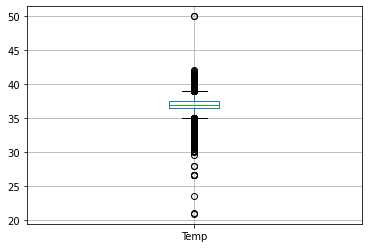

In [10]:
t_df[vital_signs].boxplot(column='Temp')

We use our prior knowledge together with the boxplot to determine invalid temperature values (30 < temp < 43)

In [11]:
t_df.loc[(t_df['Temp'] >= 43) | (t_df['Temp'] <= 30), 'Temp'] = np.nan
t_df['Temp'] = t_df.groupby('id')['Temp'].ewm(com=0.5).mean().bfill().reset_index(level=0, drop=True)

<AxesSubplot:>

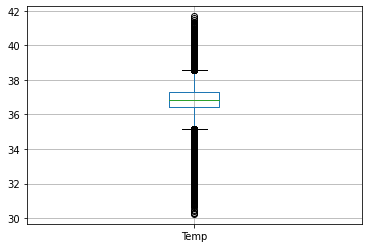

In [12]:
t_df[vital_signs].boxplot(column='Temp')

<AxesSubplot:>

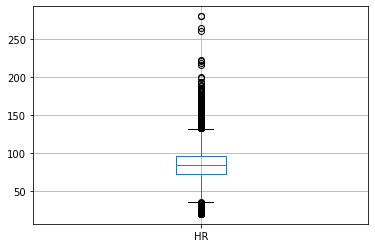

In [14]:
t_df[vital_signs].boxplot(column='HR')

In [17]:
t_df['HR'] = t_df.groupby('id')['HR'].ewm(com=0.5).mean().bfill().reset_index(level=0, drop=True)

<AxesSubplot:>

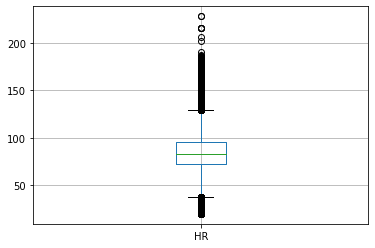

In [18]:
t_df[vital_signs].boxplot(column='HR')

<AxesSubplot:ylabel='Frequency'>

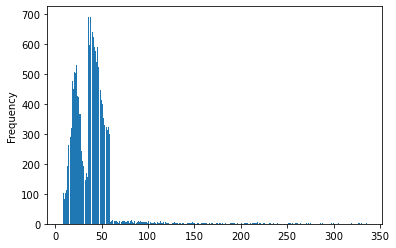

In [19]:
t_df['id'].value_counts().plot.hist(bins=370)

In [11]:
it = (g for i, g in t_df.groupby('id'))

In [13]:
next(it).plot.scatter(x='ICULOS', y='Temp')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [62]:
t_df[t_df['Unit1'].isna().groupby('id').any()]

AttributeError: 'DataFrameGroupBy' object has no attribute 'isna'

In [29]:
t_df[list(lab_values) + ['id']].groupby('id').count()

,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
id,,,,,,,,,,,,,,,,,,,,,
0.0,0,1,0,0,0,0,0,1,0,1,...,1,1,0,0,1,1,0,1,0,1
1.0,4,4,8,4,4,0,0,3,0,3,...,3,3,0,0,4,4,2,3,0,3
2.0,0,1,3,0,0,0,1,1,1,0,...,0,1,1,0,1,1,1,1,0,1
3.0,0,2,0,0,0,0,0,2,0,2,...,2,2,0,0,2,2,2,2,0,2
4.0,0,0,0,0,0,0,0,1,0,1,...,0,2,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995.0,2,0,7,4,2,2,0,1,0,0,...,0,0,0,0,5,5,0,0,0,0
19996.0,5,2,14,5,5,0,0,2,0,2,...,2,2,0,0,3,1,0,1,0,1
19997.0,0,1,0,0,0,0,0,1,0,1,...,1,1,0,0,1,1,1,1,0,1


In [34]:
t_df[list(lab_values) + ['id']]

,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19999.0
776769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19999.0
776770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19999.0
776771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19999.0


In [ ]:
import seaborn as sb
corr = t_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [43]:
t_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,id,Unit3
0,61.000000,NaN,36.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,1,0.0,0.0,0.0
1,61.000000,99.0,36.440000,124.0,65.0,43.0,17.5,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,2,0.0,0.0,0.0
2,63.250000,98.0,36.440000,125.0,64.0,41.0,27.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,3,0.0,0.0,0.0
3,58.230769,100.0,36.440000,123.0,65.0,41.0,9.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,4,0.0,0.0,0.0
4,63.475000,99.0,36.440000,120.0,67.0,43.0,23.0,NaN,NaN,NaN,...,NaN,75.91,0.0,0.0,1.0,-98.60,5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776768,83.485047,NaN,36.330025,85.0,53.0,NaN,17.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,50,0.0,19999.0,1.0
776769,81.828180,99.0,36.330008,99.0,51.0,NaN,17.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,51,0.0,19999.0,1.0
776770,83.942798,100.0,36.330003,103.0,48.0,NaN,26.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,52,0.0,19999.0,1.0
776771,85.314282,93.0,36.330001,87.0,44.0,NaN,22.0,NaN,NaN,NaN,...,NaN,83.14,0.0,0.0,0.0,-0.03,53,0.0,19999.0,1.0


In [59]:
c = t_df.copy()
c[lab_values] = t_df[list(lab_values)].isna().astype(int) * -1 + 1
c[lab_values] = c[list(lab_values) + ['id']].groupby('id').cumsum().divide(t_df['ICULOS'], axis=0)
c[list(lab_values) + ['id']].groupby('id').corr()

BaseExcess  HCO3      FiO2        pH     PaCO2      SaO2  \
id                                                                             
0.0     BaseExcess         NaN   NaN       NaN       NaN       NaN       NaN   
        HCO3               NaN   1.0       NaN       NaN       NaN       NaN   
        FiO2               NaN   NaN       NaN       NaN       NaN       NaN   
        pH                 NaN   NaN       NaN       NaN       NaN       NaN   
        PaCO2              NaN   NaN       NaN       NaN       NaN       NaN   
...                        ...   ...       ...       ...       ...       ...   
19999.0 Hgb           0.194375   1.0 -0.356557  0.194375  0.143092  0.778318   
        PTT                NaN   NaN       NaN       NaN       NaN       NaN   
        WBC           0.194375   1.0 -0.356557  0.194375  0.143092  0.778318   
        Fibrinogen         NaN   NaN       NaN       NaN       NaN       NaN   
        Platelets     0.194375   1.0 -0.356557  0.194375  0.143092  0.778318   

                         AST  BUN  Alkalinephos  Calcium  ...  Phosphate  \
id                                                        ...              
0.0     BaseExcess       NaN  NaN           NaN      NaN  ...        NaN   
        HCO3             NaN  1.0           NaN      1.0  ...        1.0   
        FiO2             NaN  NaN           NaN      NaN  ...        NaN   
        pH               NaN  NaN           NaN      NaN  ...        NaN   
        PaCO2            NaN  NaN           NaN      NaN  ...        NaN   
...                      ...  ...           ...      ...  ...        ...   
19999.0 Hgb         0.868551  1.0      0.868551      1.0  ...        1.0   
        PTT              NaN  NaN           NaN      NaN  ...        NaN   
        WBC         0.868551  1.0      0.868551      1.0  ...        1.0   
        Fibrinogen       NaN  NaN           NaN      NaN  ...        NaN   
        Platelets   0.868551  1.0      0.868551      1.0  ...        1.0   

                    Potassium  Bilirubin_total  TroponinI  Hct  Hgb  PTT  WBC  \
id                                                                              
0.0     BaseExcess        NaN              NaN        NaN  NaN  NaN  NaN  NaN   
        HCO3              1.0              NaN        NaN  1.0  1.0  NaN  1.0   
        FiO2              NaN              NaN        NaN  NaN  NaN  NaN  NaN   
        pH                NaN              NaN        NaN  NaN  NaN  NaN  NaN   
        PaCO2             NaN              NaN        NaN  NaN  NaN  NaN  NaN   
...                       ...              ...        ...  ...  ...  ...  ...   
19999.0 Hgb               1.0         0.868551        NaN  1.0  1.0  NaN  1.0   
        PTT               NaN              NaN        NaN  NaN  NaN  NaN  NaN   
        WBC               1.0         0.868551        NaN  1.0  1.0  NaN  1.0   
        Fibrinogen        NaN              NaN        NaN  NaN  NaN  NaN  NaN   
        Platelets         1.0         0.868551        NaN  1.0  1.0  NaN  1.0   

                    Fibrinogen  Platelets  
id                                         
0.0     BaseExcess         NaN        NaN  
        HCO3               NaN        1.0  
        FiO2               NaN        NaN  
        pH                 NaN        NaN  
        PaCO2              NaN        NaN  
...                        ...        ...  
19999.0 Hgb                NaN        1.0  
        PTT                NaN        NaN  
        WBC                NaN        1.0  
        Fibrinogen         NaN        NaN  
        Platelets          NaN        1.0  

[520000 rows x 26 columns]

In [ ]:
ax = c.reset_index().plot.scatter(x = 'index', y=lab_values[0])
for col in lab_values[1:]:
    ax = c.reset_index().plot.scatter(x = 'index', y=col, ax=ax)